# Pêcheries. 1. Modèles simples de pêche.




Le but de ce notebook est de comprendre certains modèles mathématiques pour les pêcheries.

On se place dans un modèle très simple, où on veut comprendre l'évolution d'une population de poissons $x(t)$ en fonction du temps. Dans ce notebook, on sera surtout intéressé par les **états stationnaires**, c'est à dire le comportement *en temps long* de $x(t)$ (est-ce que $x(t) \mapsto x_*$ par exemple).


## Équation aux dérivées ordinaires
L'outil mathématique de base que nous allons utiliser s'appelle "*équation aux dérivées ordinaires*" (EDO). Une EDO s'écrit de la forme
$$
    \boxed{ x'(t) = f(t, x(t)).}
$$
Cette équation signifie que la variation de la population au temps $t$, $x'(t)$, dépend uniquement du temps $t$, et de la population au temps $t$, $x(t)$. Il n'y a pas d'effet "*mémoire*" ($x'(t)$ ne dépend pas des temps $s < t$).

### Équation autonome

On dit que l'ODE est **autonome**, si elle est de la forme
$$
    \boxed{ x'(t) = f(x(t)).}
$$
Cela signifie que l'évolution de la population ne dépend que de la population (et pas du temps). 

- **Exercice**: Montrer que si $x(t)$ est solution de l'équation autonome, alors, pour tout $T \in \mathbb{R}$ fixe, $x(t - T)$ aussi.


On dit que $x_*$ est un **point stationnaire** si $f(x_*) = 0$.

- **Exercice**: Montrer que si $x_*$ est un point stationnaire, alors la fonction constante $x(t) := x_*$ est solution de l'EDO autonome.

Autrement dit, si une population commence en $x_*$, elle reste en $x_*$.

On admettra le principe général suivant (ce principe est **faux** en général, mais est vrai dans les modèles qu'on regardera ici) :

>  Toute solution $x(t)$ de l'EDO autonome converge vers un point stationnaire : $\lim_{t \to \infty} x(t) = x_*$.

Ainsi, pour comprendre le comportement en temps long de $x(t)$, il suffit de calculer les points stationnaires de $f$. C'est ce qu'on fera dans ce notebook.

In [1]:
# on charge les bibliothèques Python
%pylab inline
figsize(8, 6)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1. L'équation logistique

Dans la situation où aucun élement extérieur vient perturber la population des poissons (absence de pêche), une équation communément admis pour modèliser la population de poisson est **l'équation logistique** (Verhulst, 1840)
$$
    \boxed{ x'(t) = f\left( x(t) \right), \qquad \text{avec} \qquad f(x) := r x \left( 1 - \frac{x}{K} \right),}
$$
où $r > 0$ et $K > 0$ sont des constantes :
- $r$ s'appelle le *taux de reproduction*,
- $K$ s'appelle la *capacité de charge*.


- **Exercice** : Calculer les points stationnaires de $f$.

- **Exercice** : Tracer la courbe $f$ sur l'interval $[-0.1, 1.1]$ pour $r = 1$ et $K = 1$. Retrouvez-vous les points stationnaires attendus ?

Text(0.5, 1.0, 'La fonction logistique')

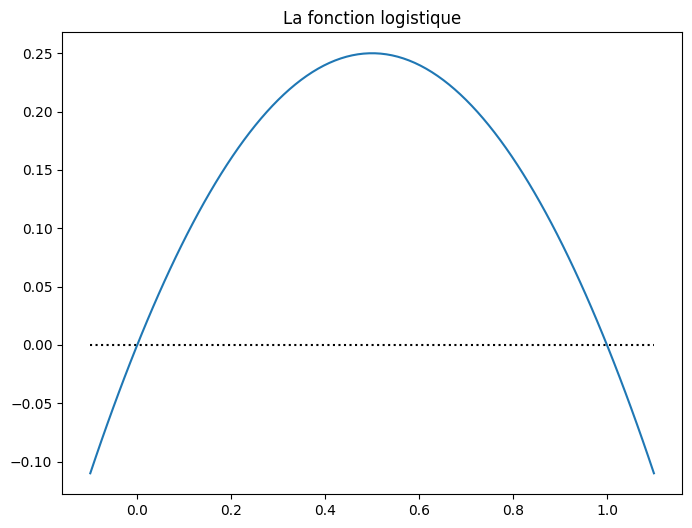

In [2]:
xx = linspace(-0.1, 1.1, 100) #100 points entre -0.1 et 1.1.
plot(xx, zeros(100), 'k:') # on trace la droite $x = 0$

# Votre code ici
r, K = 1, 1
def f(x) : return r*x*(1 - x/K)
plot(xx, f(xx))
# fin code

title("La fonction logistique")

- **Exercice**: Montrer que si, en $t = 0$, on a $x(0) \in [0, K]$, alors $x(t)$ est une fonction croissante.

- **Exercice**: En déduire que $x(t)$ converge vers $K$ en temps long.

Autrement dit, si on arrête de pêcher un jour, la population de poissons retrouvera toujours sa capacité de charge $K > 0$.

On peut résoudre une EDO avec la fonction `solve_ivp` de scipy (*solve initial value problem* : voir [ici](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) pour la description). Voici un prototype :

In [3]:
from scipy.integrate import solve_ivp

Text(0.5, 1.0, 'Evolution de la population $x(t)$ en fonction du temps')

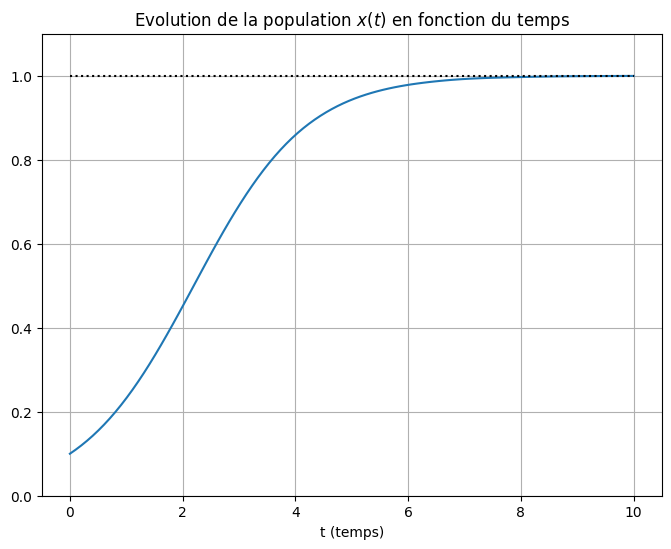

In [4]:
# initialisation des variables pour le temps
Tmax = 10 # on résoud l'équation entre t = 0 et t = Tmax
tt = linspace(0, Tmax, 100) # la grille temporelle sur laquelle on va tracer notre solution

# la fonction logistique
r, K = 1, 1
def f_logistique(t, x): return r*x*(1 - x/K) # la fonction f. Il faut mettre l'argument t même si f ne dépend pas de t

#condition initiale à t = 0
x0 = 1/10

# on résoud avec solve_ivp
sol = solve_ivp(f_logistique, [0, Tmax], [x0], t_eval = tt)

# Plot
plot(sol.t, sol.y[0,:])
plot(tt, ones(100), ':k')
grid()
ylim([0, 1.1*K]) # on fixe l'axe y entre 0 et K.
xlabel("t (temps)")

title("Evolution de la population $x(t)$ en fonction du temps")

- **Exercice** Montrer que pour tout $a > 0$, la fonction
$$
    x(t) := \dfrac{K}{1 + a \exp(-r t)}
$$
est solution de l'équation.

> En pratique, la valeur de $a$ dépend de la condition initiale : $x_0 = \dfrac{K}{1 + a}$.

## 2. Changement de variables

Il y a deux paramètres dans le modèle logistique, $r$ et $K$. En fait, quitte à faire un **changement de variable**, on peut se ramener à un modèle *sans paramètres*.

- **Exercice**: En posant $x(t) = K y(rt)$, montrer que $x$ est solution de 
$$
    x' = r x \left( 1 - \frac{x}{K} \right), \qquad \text{ssi} \qquad y' = y(1 - y).
$$

Autrement dit, on peut toujours se ramener au cas $r = 1$ et $K = 1$. L'interprétation est la suivante :
- On se place dans une échelle de temps différente pour obtenir $r = 1$; 
- On se place dans une échelle de *poissons* différente pour obtenir $K = 1$. On compte notre population en "pourcentage de K" (la charge maximale).

Évidemment, pour un type spécifique de problème, les valeurs de $r$ et de $K$ sont différentes (dépendant du type de Poisson, du lieu, etc.), mais cela revient à faire des changement d'échelles différentes "par espèce de poissons".

Dans la suite, on se placera dans le cas $r = 1$ et $K = 1$ (plus mathématique, mais moins physique).


## 3. Une pêche "durable"

Dans le premier modèle de pêche qu'on regarde, on suppose qu'on pêche une quantité fixe $h$ de poissons (la lettre $h$ est pour *harvest*), indépendante du temps. Notre équation d'évolution devient donc
$$
    \boxed{ x'(t) = f_d(x(t)), \qquad \text{avec} \quad f_d(x) := x \left( 1 - x \right) - h. }
$$

- **Exercice**. Calculer les points stationnaires de $f_d$.
- **Exercice**. Montrer que si $h > \frac14$, alors $f_d(x) < 0$ pour tout $x \in \mathbb{R}$. Que se passe-t-il dans ce cas ?

> La quantité $h_{\rm MSY} := \frac14$ (ou $h_{\rm MSY} = \frac14 rK$ en unités initiales) est appelé *maximum sustainable yield* (MSY). C'est la quantité maximale de poissons qu'on peut pêcher durablement : on peut pêcher au maximum 1/4 de la réserve maximale de poissons en une unité de temps.

- **Exercice**. Tracer sur le même graphique l'évolution de la population de poissons pour $h = 0.2$, $h = 1/4$ et $h = 0.3$, et pour une population initiale de poissons $x_0$ de votre choix.

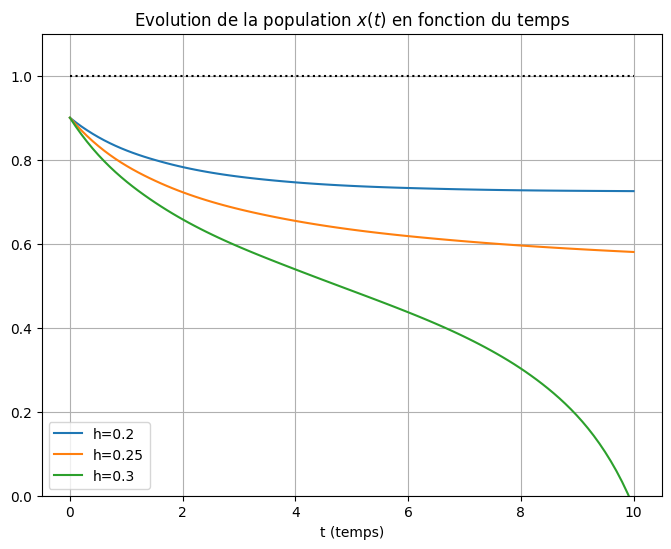

In [6]:
# initialisation des variables pour le temps
Tmax = 10 # on résoud l'équation entre t = 0 et t = Tmax
tt = linspace(0, Tmax, 100) # la grille temporelle sur laquelle on va tracer notre solution

# la pêche durable (avec r = K = 1)
def f_durable(t, x, h): return  x*(1 - x) - h # la fonction f durable

#condition initiale à t = 0
x0 = 0.9

hh = [0.2, 1/4, 0.3] # les valeurs de h

for h in hh:
    # on résoud avec solve_ivp
    sol = solve_ivp(f_durable, [0, Tmax], [x0], t_eval = tt, args = [h] )
    # Plot
    plot(sol.t, sol.y[0,:], label = f"h={h}")
    
plot(tt, ones(100), ':k')
grid()
ylim([0, 1.1*K]) # on fixe l'axe y entre 0 et K.
xlabel("t (temps)")
legend()

_ = title("Evolution de la population $x(t)$ en fonction du temps")

- **Exercice** Montrer que pour $h = h_{\rm MSY}$, on a $x(t) \to 1/2$ en temps long.

Dans le sénario MSY, la population se stabilise à la moitié de sa capacité maximale : 1/4 de la population de renouvelle à chaque unité de temps, et on prélève ce 1/4 en pêchant.

**Les quantités MSY sont**
$$
    \boxed{ x_{\rm MSY} = \frac12, \qquad h_{\rm MSY} = \frac14.  }
$$

## 3. L'effort de pêche


En pratique, il n'est pas raisonnable de supposer qu'on puisse toujours pêcher $h(t) = h$ poissons. Par exemple, s'il ne reste que $h$ poissons, il faudrait passer toute une mer au peigne fin pour trouver ces $h$ poissons.


On préfèrera un modèle où la quantité de poissons pêchés au temps $t$ est de la forme $h = h(t) = E(t) x(t)$.
- Le paramètre $E(t) > 0$ s'appelle **l'effort**. Il modèlise par exemple le nombre de bateaux qu'on envoie en mer et leur efficacité. 
- C'est la quantité qu'on peut **contrôler**, nous, pêcheurs (on décide de combien de bateaux on envoie en mer).
- La pêche est proportionnelle en le nombre de bâteaux, et en nombre de poissons : plus il y a de poissons, plus c'est facile d'en pêcher.


On commencer par regarder le cas de l'effort constant $E(t) = E$ indépendant de $t$. Notre nouveau modèle de pêche s'écrit donc
$$
    \boxed{ x'(t) = f_E(x(t)) , \quad \text{avec} \quad f_E(x) := x(1 - x) - E x.}
$$

- **Exercice** Quels sont les points stationnaires de $f_E$ ? Montrer que pour $E > 1$, on a $f_E(x) < 0$ pour tout $x > 0$. Que se passe-t-il dans ce cas ?
- **Exercice** Montrer que pour $0 < E < 1$, il existe un unique point stationnaire strictement positif, donné par $x_E := (1 - E)$.


La quantité de poissons pêchés au temps $t$ est $h(t) = E x(t)$. 

- **Exercice** Montrer qu'en temps long, cette quantité vaut $h_E := E (1 - E)$. 
- **Exercice** Montrer que cette quantité est optimale pour $E = \frac12$, et que dans ce cas, $x_E = \frac12$ et $h_{E = \frac12} = \frac14$.
- **Exercice** Tracer la fonction $E \mapsto h_E$. Comment interprétez-vous la courbe ?


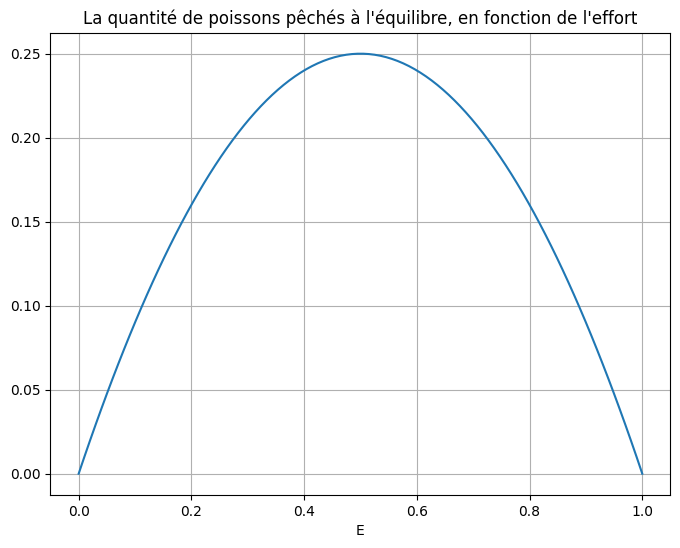

In [7]:
def hE(E) : return E*(1 - E)

EE = linspace(0, 1, 100)
plot(EE, hE(EE))

grid()
xlabel("E")
_ = title("La quantité de poissons pêchés à l'équilibre, en fonction de l'effort")

- **Exercice** Tracer sur le même graphique $x(t)$ et $h(t)$ pour $E = \frac14$ et $E = \frac34$, et pour une population initiale de poissons $x_0$ de votre choix. Qu'observez-vous ?

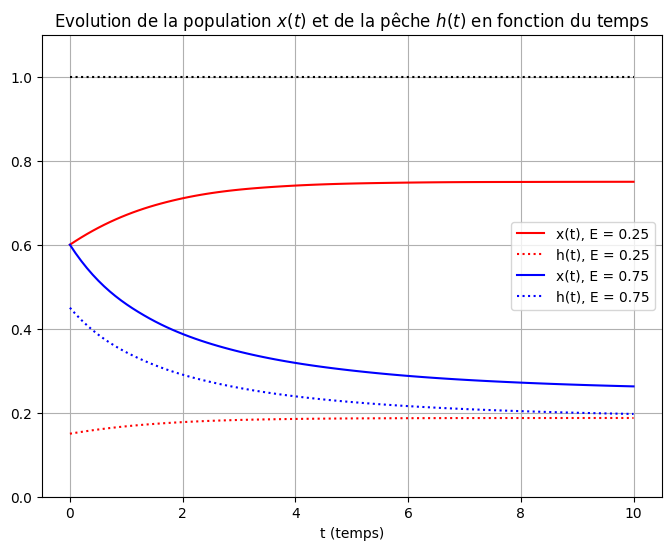

In [8]:
x0 = 0.6

EE = [1/4, 3/4]
color = ['r', 'b']

# la pêche avec effort
def f_E(t, x, E): return  x*(1 - x) - E*x # la fonction f avec effort

# on résoud avec solve_ivp
for i in range(2):
    E = EE[i]
    sol = solve_ivp(f_E, [0, Tmax], [x0], t_eval = tt, args = [E] )

    # Plot 
    plot(sol.t, sol.y[0,:], color[i], label = "x(t), E = {}".format(E)) # la pêche
    plot(sol.t, E*sol.y[0,:], ':'+color[i], label="h(t), E = {}".format(E))
    
plot(tt, ones(100), ':k')
grid()
ylim([0, 1.1*K]) # on fixe l'axe y entre 0 et K 
xlabel("t (temps)")
legend()


_ = title("Evolution de la population $x(t)$ et de la pêche $h(t)$ en fonction du temps")

Dans les deux cas, on a la même quantité de pêche, mais on a fourni trois fois plus d'efforts dans le scénario $E = \frac34$. En effet, la population de poissons est moindre, et il faut un plus grand effort pour les trouver.


**Dans le sénario où la pêche est maximale, on a**
$$
    \boxed{ x_* = \frac12 = x_{\rm MSY}, \quad h_* = \frac14 = h_{\rm MSY}, \quad \text{et} \quad
    E_* = \frac12.}
$$